In [70]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
import numpy as np

In [19]:
data = pd.read_csv("Datos_gr.csv")
del data["Timestamp"]
del data["Unnamed: 0"]

In [20]:
data.columns

Index(['Facultad ', 'Sexo', 'Edad', 'Semestre(número)', 'Orientación Sexual',
       'Religión', 'Estatura(cm)', 'Peso(kg)', 'Cantidad de Parejas Sexuales',
       'Edad Primera Vez', 'Activo Sexualmente', 'Frecuencia(Mes)',
       'Bachillerato de Origen', 'Hermanos Edades', 'Edad Padre',
       'Escolaridad Padre', 'Edad Madre', 'Escolaridad Madre', 'Delegación',
       'Has tenido relaciones con desconocidos',
       'Consumes bebidas alcohólicas', 'Frecuencia de consumo al mes(número)',
       'Consumes marihuana', 'Frecuencia al mes(número)', 'Hermana Mujer',
       'Hermano Hombre', 'Hijo Unico', 'Hermano Menor', 'Hermano Enmedio',
       'Hermano Mayor'],
      dtype='object')

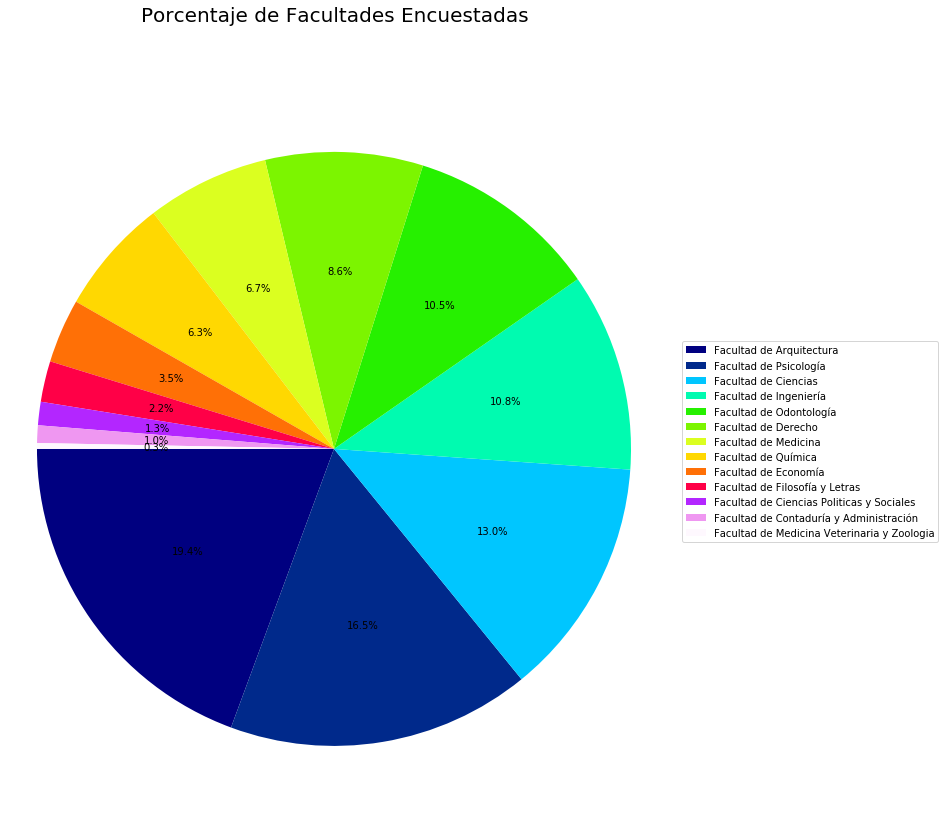

In [112]:
# Etiquetas de cada las distintas facultades
labels = data["Facultad "].value_counts().index.values.tolist()

# Frecuencia de cada facultad
sizes = data["Facultad "].value_counts().values

fig = plt.figure(figsize=(13, 13))

colores = np.linspace(0,1, len(labels))

plt.title("Porcentaje de Facultades Encuestadas", fontsize = 20, y = 1.08)

# Creación del diagrama de pastel
pie = plt.pie(sizes, autopct = '%1.1f%%', shadow = False, startangle = 180, colors = cm.get_cmap('gist_ncar')(colores))

plt.axis('equal') 

# Ajustamos la leyenda para que apareza a la derecha del diagrama de pasterl
plt.legend(pie[0], labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

plt.subplots_adjust(left=0.0, bottom=0.1, right=0.7)
plt.show()

In [ ]:
plt.scatter